# Trial durations new bigger box vs old boxes

In [2]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import os
%matplotlib inline 

## Load in record

In [3]:
record = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/session_record.csv',index_col=0)

In [4]:
q43_ = record[(((record['Mouse ID']=='q43') |(record['Mouse ID']=='Q43')) & (record['p(high Port)'] > 0))].copy()
q45_ = record[(((record['Mouse ID']=='q45') |(record['Mouse ID']=='Q45')) & (record['p(high Port)'] > 0))].copy()
q43 = q43_.loc[623:].copy()
q45 = q45_.loc[644:].copy()

In [5]:
q43

,Session ID,Mouse ID,Date,Phase,Left Reward Prob,Right Reward Prob,Block Range Min,Block Range Max,No. Trials,No. Blocks,No. Rewards,p(high Port),Decision Window Duration,Min Inter-trial-interval,Left Solenoid Duration,Right Solenoid Duration
623,01182017_q43,q43,2017-01-18 00:00:00,2.0,0.1,0.9,50.0,50.0,311.0,5.0,251.0,0.83,3.0,1.0,40.0,35.0
624,01242017_q43,q43,2017-01-24 00:00:00,2.0,0.1,0.9,50.0,50.0,362.0,4.0,250.0,0.71,2.0,1.0,35.0,35.0
625,01252017_q43,q43,2017-01-25 00:00:00,2.0,0.1,0.9,50.0,50.0,520.0,8.0,405.0,0.87,2.0,1.0,35.0,35.0
626,01262017_q43,q43,2017-01-26 00:00:00,2.0,0.9,0.1,50.0,50.0,541.0,8.0,421.0,0.85,2.0,1.0,35.0,35.0
627,01272017_q43,q43,2017-01-27 00:00:00,2.0,0.1,0.9,50.0,50.0,550.0,8.0,425.0,0.82,2.0,1.0,35.0,35.0
628,01302017_q43,q43,2017-01-30 00:00:00,2.0,0.1,0.9,50.0,50.0,546.0,8.0,399.0,0.80,2.0,1.0,35.0,35.0
629,01312017_q43,q43,2017-01-31 00:00:00,2.0,0.9,0.1,50.0,50.0,561.0,8.0,404.0,0.82,2.0,1.0,35.0,35.0
630,02012017_q43,q43,2017-02-01 00:00:00,2.0,0.9,0.1,50.0,50.0,607.0,9.0,493.0,0.92,2.0,1.0,35.0,35.0
631,02022017_q43,q43,2017-02-02 00:00:00,2.0,0.9,0.1,50.0,50.0,511.0,8.0,420.0,0.90,2.0,1.0,35.0,35.0
632,02202017_q43,q43,2017-02-20 00:00:00,2.0,0.9,0.1,50.0,50.0,523.0,8.0,395.0,0.80,2.0,1.0,35.0,35.0


## Load in trial matrices

In [28]:
'''
load in trial data
'''

#let's just start with 03312017
session_names = ['03302017_Q43','03312017_Q43','03242017_Q43']

columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked','Right Reward Prob','Left Reward Prob','Reward Given']

root_dir = '/Users/shayneufeld/GitHub/mouse_bandit/data/trial_data'

trial_df = []

for session in session_names:
    full_name = session + '_trials.csv'
    
    path_name = os.path.join(root_dir,full_name)
    
    trial_df.append(pd.read_csv(path_name,names=columns))

mouse_ids = q43['Mouse ID'].values

In [23]:
len(trial_df)

2

# Hist of trial durations

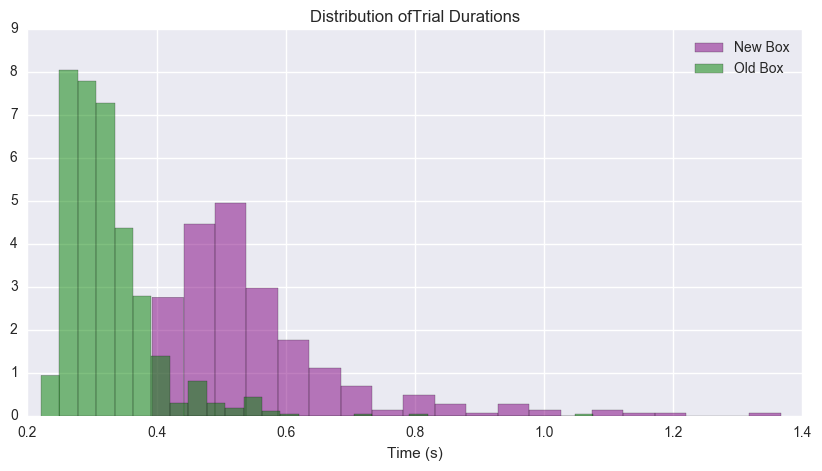

In [29]:
plt.figure(figsize=(10,5))
plt.hist(trial_df[0]['Trial Duration (s)'].values,bins=20,color='purple',alpha=0.5,label='New Box',normed=True)
plt.hist(trial_df[2]['Trial Duration (s)'].values,bins=30,color='green',alpha=0.5,label='Old Box',normed=True)
plt.legend(loc='upper right')
plt.title('Distribution ofTrial Durations')
plt.xlabel('Time (s)')